In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 
# Za prikaz grafov neposredno v Jupyter Notebook

In [14]:
def merge_nodes(G, nodes, new_node, attr_dict=None, **attr):
    # Funkcija za združenje dveh vozlišč v grafu
    # Naredimo kopijo osnovnega grafa
    new_graph = G.copy()


    merged_attr = attr_dict or {}
    merged_attr.update(attr)

    # Dodamo novo vozlišče v graf
    new_graph.add_node(new_node, **merged_attr)

    # Naredimo povezave v novo vozlišče
    for n1, n2, data in G.edges(data=True):
        if n1 in nodes:
            new_graph.add_edge(new_node, n2, **data)
        elif n2 in nodes:
            new_graph.add_edge(n1, new_node, **data)

    # Odstranimo vozlišča ki smo jih združili
    for n in nodes:
        new_graph.remove_node(n)

    return new_graph


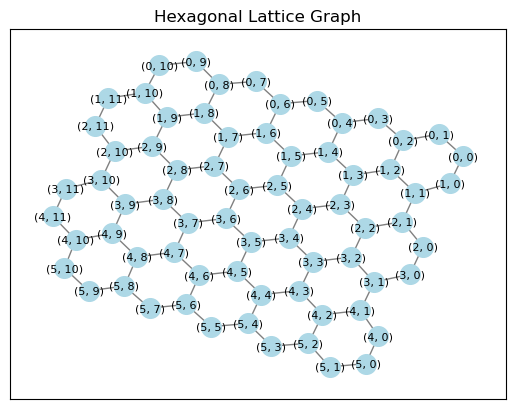

In [17]:
rows = 5  # Število vrstic v grafu
cols = 5  # Število stolpcev v grafu
hex_graph = nx.hexagonal_lattice_graph(rows, cols)

# Nerišemo graf
pos = nx.kamada_kawai_layout(hex_graph)  # Layout to make the hexagonal structure visible
nx.draw_networkx(hex_graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=200, font_size = 8)

plt.title("Hexagonal Lattice Graph")
plt.show()

In [16]:
hex_graph3 = hex_graph

for i in range(6):
    hex_graph3 = merge_nodes(hex_graph3, nodes=[(i, 10), (i, 0)], new_node=(i, "merged10"))

for i in range(1, 5):  # range(1, 5) generates numbers from 
    hex_graph3 = merge_nodes(hex_graph3, nodes=[(i, 11), (i, 1)], new_node=(i, "merged11"))

# Draw the final graph
#plt.figure(figsize=(8, 6))
#pos = nx.kamada_kawai_layout(hex_graph3)  # Use a layout that displays the structure well
#nx.draw_networkx(
#    hex_graph3, pos, with_labels=True, node_color="lightblue",
#    edge_color="gray", node_size=500, font_size=8
#)
#plt.title("Graph After Merging Nodes")
#plt.show()

In [18]:
# izracuna vektor razdalj za naš 5x5 graf
vektorji_razdalj = izračunaj_vektorje_razdalj(hex_graph3)

# gledamo samo točke iz prve orbite
specific_nodes = [(0, 1), (0, 3), (0, 5), (0, 7), (0, 9)]

# uporabimo for loop da pokažemo da so iste razdalje
for vozlišče in specific_nodes:
    if vozlišče in vektorji_razdalj:
        print(f"Vozlišče {vozlišče}: {vektorji_razdalj[vozlišče]}")
    else:
        print(f"Vozlišče {vozlišče} ni v grafu.")


Vozlišče (0, 1): [1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5, 5]
Vozlišče (0, 3): [1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5, 5]
Vozlišče (0, 5): [1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5, 5]
Vozlišče (0, 7): [1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5, 5]
Vozlišče (0, 9): [1, 2, 4, 5, 7, 7, 7, 6, 6, 5, 5, 5]
